<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/GradientBoosting_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бустинг

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor

# Практика 1
## Загрузка данных для практики

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data,
                                                    housing.target,
                                                    random_state=42)

In [ ]:
regr_tree = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = regr_tree.predict(X_test)
mean_squared_error(y_test, y_pred)

0.5338480505935852

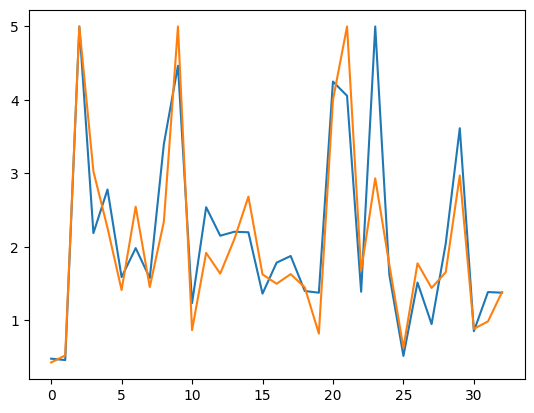

In [ ]:
plt.plot(y_test[:33])
plt.plot(y_pred[:33]);

## Реализация градиентного бустинга
Напишите по шаблону класс для градиентного бустинга:
- атрибутом класса сделайте список деревьев глубины 3 (параметр консруктора - количество деревьев)
- в цикле обучения предусмотрите обучение каждого следующего дерева на градиенте (промахе) предыдущего дерева от целевого вектора
- продумайте и реализуйте (на дополнительную оценку) использование шага обучения (learning_rate)
- в предсказании реализуйте  цикл, аналогичный методу обучения
- реализуйте дополнительный метод предсказания на ограниченном количестве деревьев

In [ ]:
class GradientBoostingRegression:
    def __init__(self, n):
        self.trees = [DecisionTreeRegressor(max_depth=4) for i in range(n)]

    def fit(self, X, y):
        self.trees[0].fit(X, y)
        y_pred = self.trees[0].predict(X)
        for i in range(1, len(self.trees)):
          grad = -(y - y_pred)
          self.trees[i].fit(X, grad)
          y_pred -= self.trees[i].predict(X)

    def predict(self, X):
      y_pred = self.trees[0].predict(X)
      for i in range(1, len(self.trees)):
          y_pred -= self.trees[i].predict(X)
      return y_pred


Протестируйте реализацию бустинга:

In [ ]:
for i in range(1, 20):
  boost = GradientBoostingRegression(i)
  boost.fit(X_train, y_train)
  y_pred = boost.predict(X_test)

  print(i, mean_squared_error(y_test, y_pred))

1 0.5732897831535345
2 0.4601125946625929
3 0.4301319544176872
4 0.40929693079906515
5 0.38459170061603876
6 0.3522462347498713
7 0.34384105238311397
8 0.327676551461358
9 0.32270667194631875
10 0.3086916573491208
11 0.3037189089398546
12 0.3027972220423678
13 0.30772797916832856
14 0.3076198711310861
15 0.31331402711610773
16 0.3069801095162176
17 0.30811553396311875
18 0.3188686140839435
19 0.31253735785370484


In [ ]:
boost = GradientBoostingRegression(11)
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)

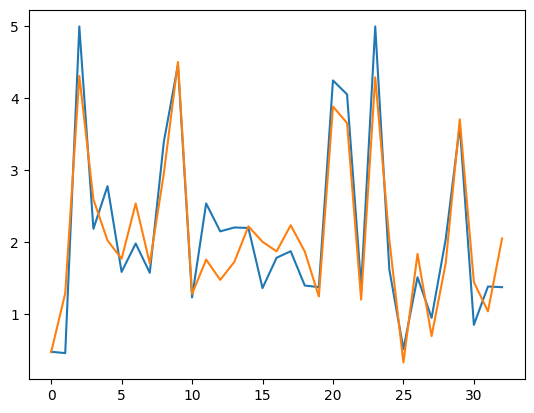

In [ ]:
plt.plot(y_test[:33])
plt.plot(y_pred[:33]);